<a href="https://colab.research.google.com/github/alphamale126/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description -**
**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** -Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

# **Importing the Modules and Loading the Dataset**

In [56]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [57]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#Reading the data file
mobile_data = pd.read_csv('/content/drive/MyDrive/Mobilepriceprediction/data_mobile_price_range.csv')

# **Exploring the data in the given dataset**

In [59]:
#Data in the top 5 rows 
mobile_data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [60]:
#Data in the bottom 5 rows
mobile_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [61]:
# Printing the shape of the dataset
print(mobile_data.shape)

(2000, 21)


In [62]:
# Checking for Null values
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [63]:
# Checking the data
mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


We can see that sc_width and px_height has minimum value 0, which is not possible in any mobile. So we need to handle this mismatch.

In [64]:
# Checking How many observations having screen width value as 0.
print(mobile_data[mobile_data['sc_w']==0].shape[0])

180


In [65]:
# Checking How many observations having px_hieght value as 0.
print(mobile_data[mobile_data['px_height']==0].shape[0])

2


In [66]:
# As there are only 2 observations having px_height=0. so we will drop it.
mobile_data=mobile_data[mobile_data['px_height']!=0]

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Before using KNN Imputer, for it to work, we need to replace 0 with NAN values.

In [67]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
mobile_data['sc_w']=mobile_data['sc_w'].replace(0,np.nan)

In [68]:
# importing KNN imputer from sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_data=pd.DataFrame(impute_knn.fit_transform(mobile_data),columns=mobile_data.columns)

In [69]:
# Checking the shape of dataset 
mobile_data.shape

(1998, 21)

In [70]:
# Checking How many observations having sc_w value as 0.
mobile_data[mobile_data['sc_w']==0].shape[0]

0

Thus we have handled the mismatched values of the data.

In [71]:
# Checking the datatypes, non null values
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

We don't have any object data type in our data set.

Also we have Zero null values in data set.

Price_range is our target variable.

In [72]:
mobile_data.nunique()

battery_power    1093
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1136
px_width         1109
ram              1561
sc_h               15
sc_w               18
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [73]:
# Checking for Null values.
mobile_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, ' Visualizing Missing Values')

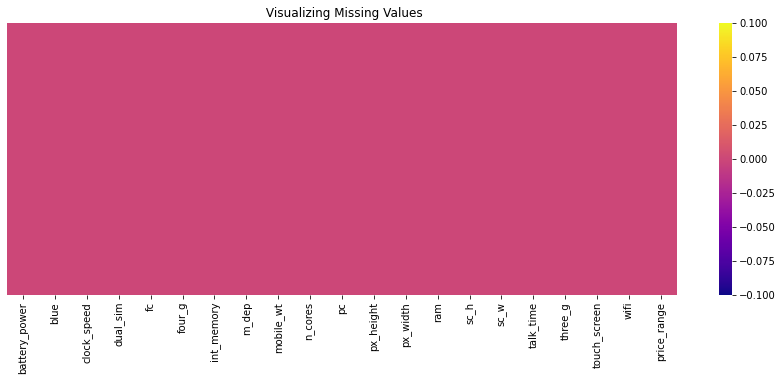

In [74]:
# Visualizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(mobile_data.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualizing Missing Values")

From the above we can say there are No Null values present in the dataset

In [75]:
# Checking for an duplicated values
mobile_data.duplicated().sum()

0

In [76]:
# Checking the Target Variable
price_range_values=mobile_data['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

We can see from the above that we have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.

Accuracy score will be the best evalaution metric for us to select the model.

This is the target variable with value of

**0**=low cost,

**1**=medium cost,

**2**=high cost,

**3**=very high cost.



# **Exploratory Data Analysis Of The Data Set**

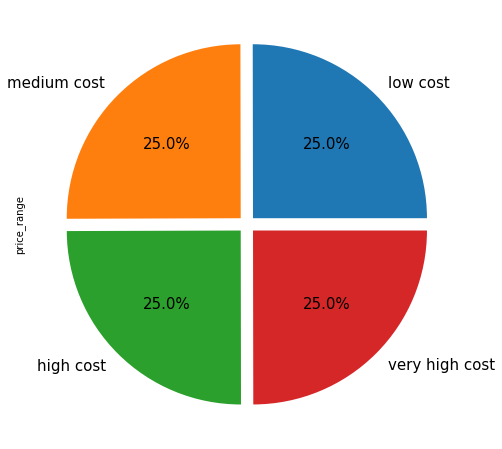

In [77]:
# Visualizing the Target variable's class distribution with a pie chart.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)

We can see that our target varibale is equally distributed.

Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.

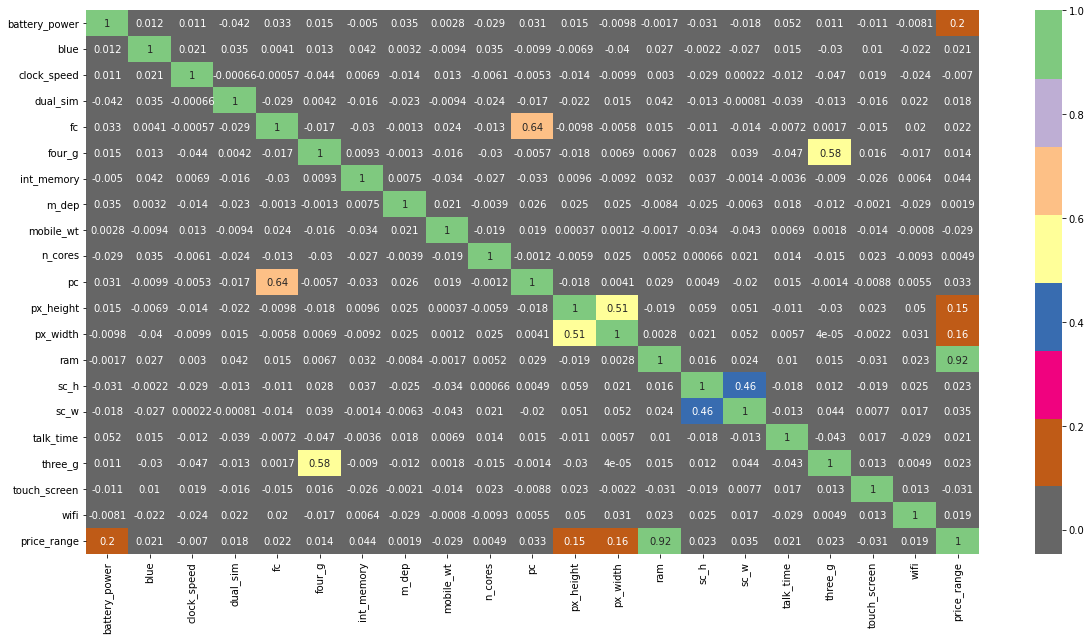

In [78]:
# Checking the correlation between Dependent and independent attributes
corr= mobile_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

From the above Heatmap we can say that

**RAM** is positively correlated with the **Price_range**, we know that Mobiles with high RAM are very costly.
Thus as **RAM** increases **price_range** increases too.

**Battery_power** is positively correlated with the **price_range**.

Generally mobiles having high prices comes with good battery power.


**px_height** and **px_width** (Pixel Resolution Height and width) are positively correlated.

Generally High price range mobiles have good resolutions.

**Four_g** and **Three_g** are highly positvely correlated.

Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.

**pc** and **fc** are positively correlated.

**sc_h** and **sc_w** are positively correlated.

## **Analysis of Categorical columns**

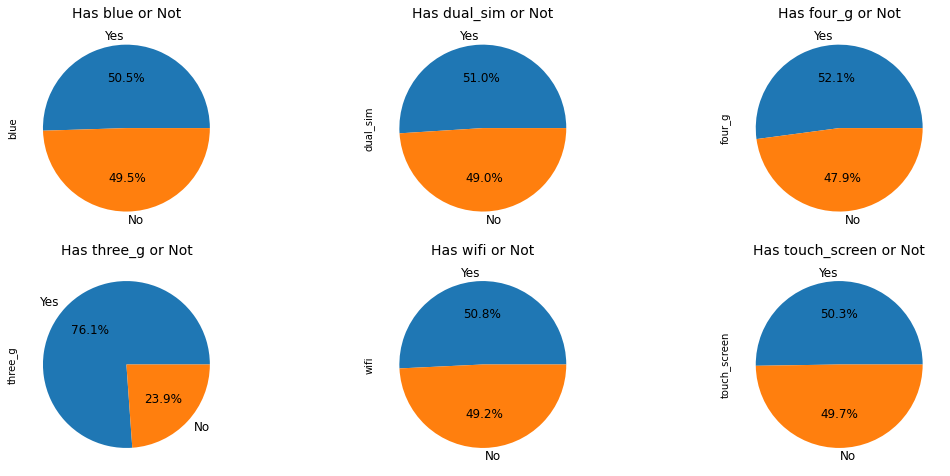

In [79]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))
rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  mobile_data[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'Has {var} or Not',fontsize=14)
  plt.tight_layout()
  count=count+1

From the above we can say that

Percentage Distribution of Mobiles having **bluetooth**, **dual_sim**, **4G**, **wifi** and **touchscreen** are almost 50 %.

We also observed that very few mobiles(**23.9%**) do not have Three_g.

## **Analysis of independent variables with respect to Dependent variable**

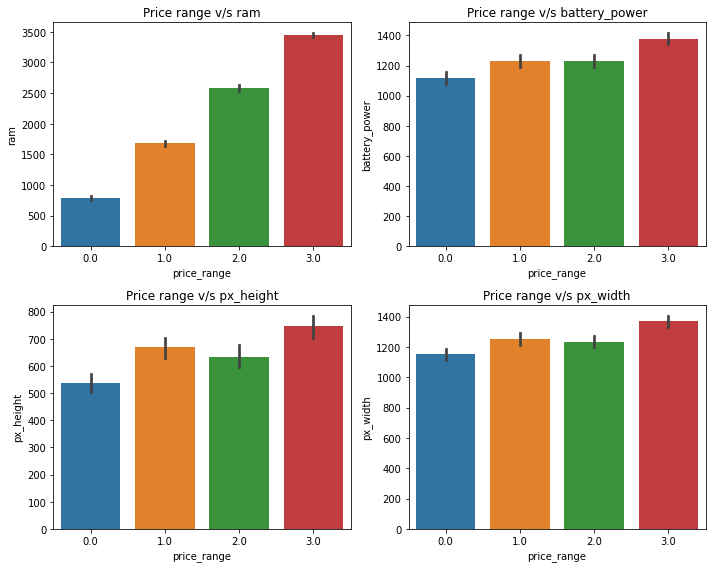

In [80]:
# Plotting  price_range vs other features
plt.figure(figsize=(10,8))
labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']
rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']
for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=mobile_data['price_range'],y=mobile_data[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

From the above plots we can say that, 

Mobiles having **RAM** more than **3000MB** has very high cost.

As **RAM** increases **price_range** also increases.

Mobiles having RAM less than **1000MB** will be of low cost.

Mobiles with battery power more than **1300mAh** has very high cost.

Mobiles with battery power between **1200** and **1300mAH** ranges under medium and high cost.

Mobiles with **pixel_height** more than **700** and **width** more than **1300** has very high cost.

In [81]:
# Checking the counts of binary categorical variables by grouping price range.
grup_by_price=mobile_data.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()
grup_by_price

blue      dual_sim      four_g      three_g      touch_screen  \
             0.0  1.0      0.0  1.0    0.0  1.0     0.0  1.0          0.0   
price_range                                                                 
0.0          257  243      250  250    241  259     127  373          238   
1.0          255  244      244  255    238  261     122  377          239   
2.0          257  243      251  249    253  247     113  387          265   
3.0          240  259      234  265    225  274     115  384          252   

                 wifi       
             1.0  0.0  1.0  
price_range                 
0.0          262  252  248  
1.0          260  247  252  
2.0          235  248  252  
3.0          247  237  262

Text(0, 0.5, 'Count of phones')

<Figure size 1008x504 with 0 Axes>

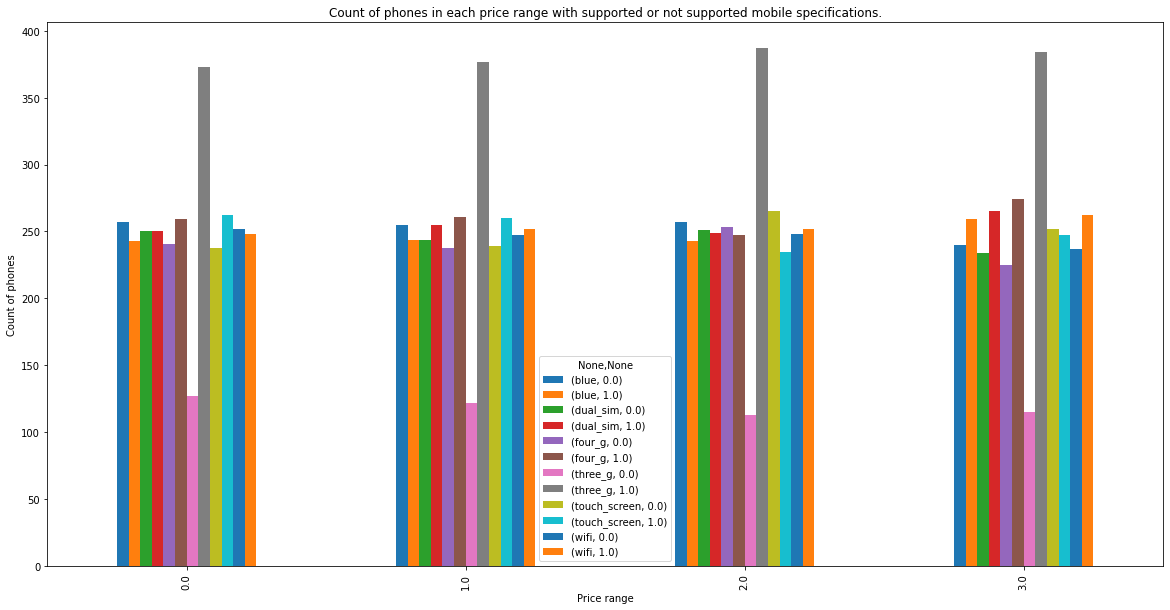

In [82]:
# Visualizing by plotting barchat.
plt.figure(figsize=(14,7))
grup_by_price.plot.bar(figsize=(20,10))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')

We can see that each price_range category has almost equal number of mobiles phones having both supporting and non supporting specification

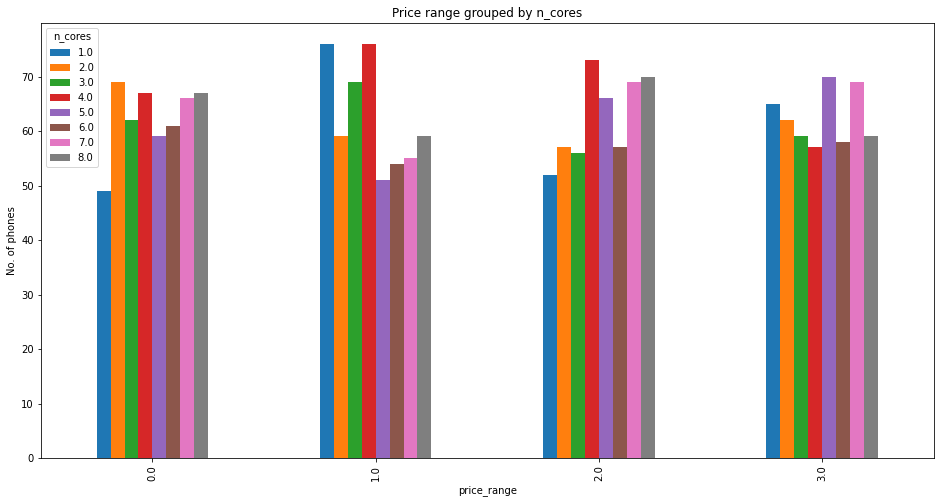

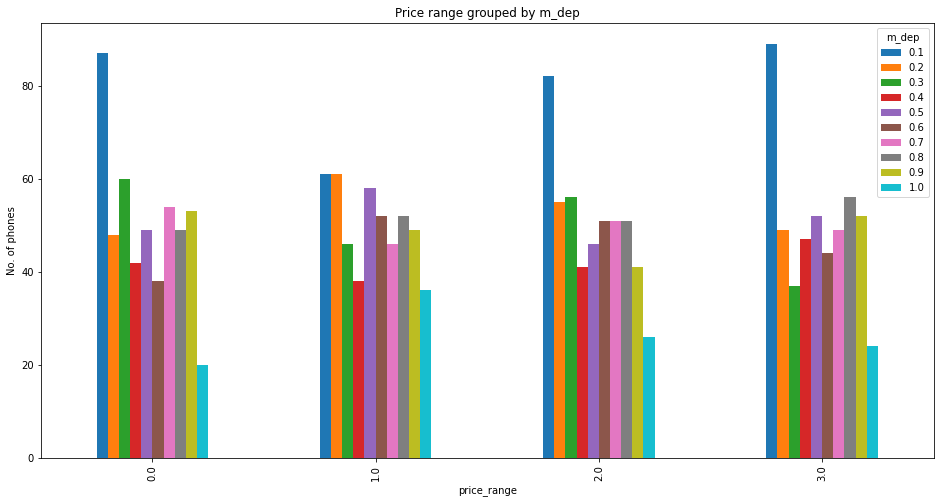

In [83]:
# Analyzing 'Price_range' with respect to 'n_cores' and 'm_dep'

list_2=['n_cores','m_dep']
for item in list_2:
  
  mobile_data.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(16,8))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

There are very few mobiles in price range 0 and 1 with lesser no of cores.

Most of the mobiles in price range 2 and 3 are with high no of cores.

Number of phones with less thickness are high and count of phones with high thickness is low.

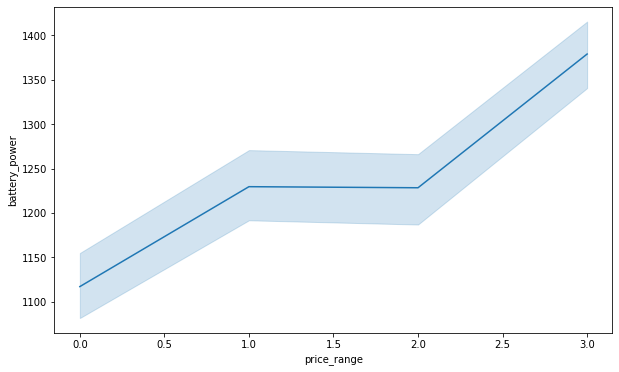

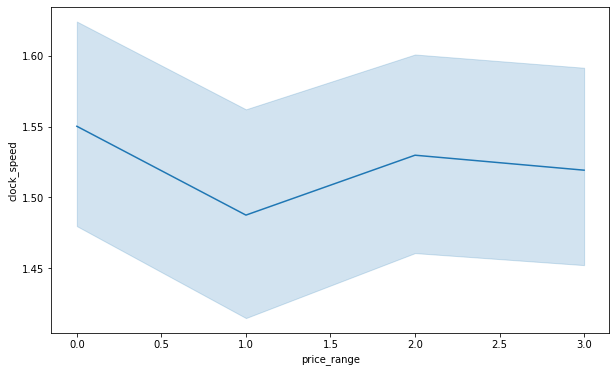

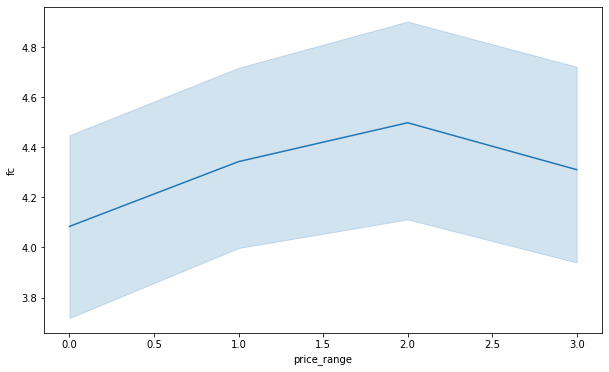

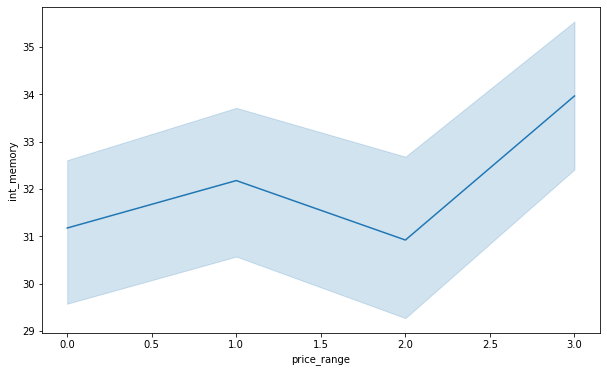

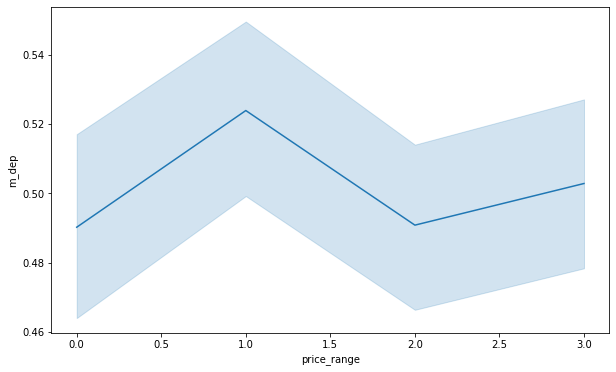

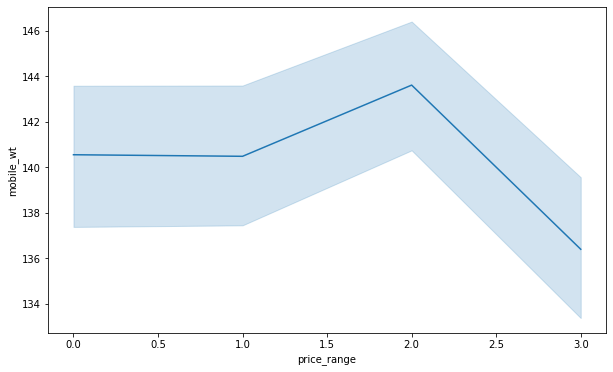

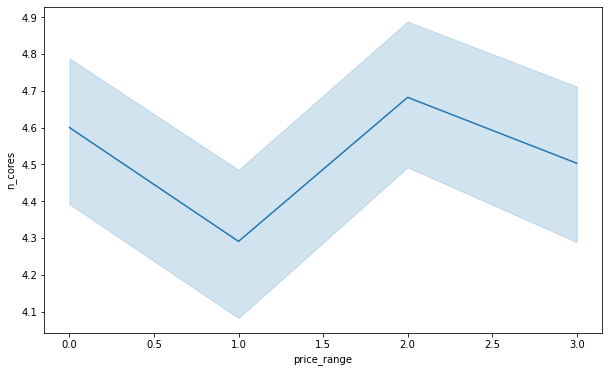

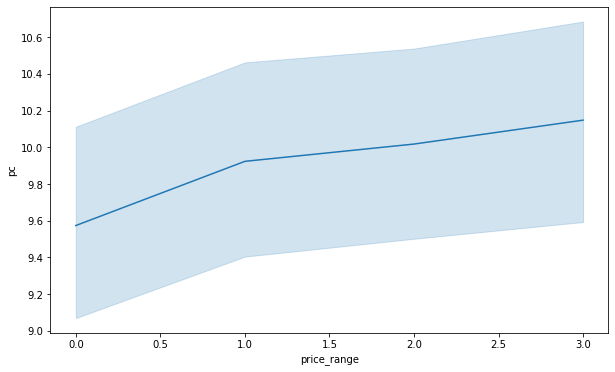

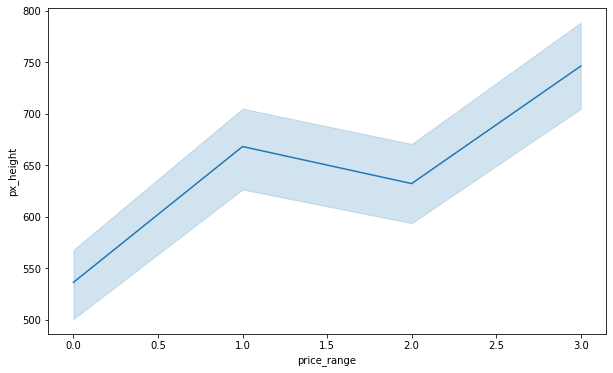

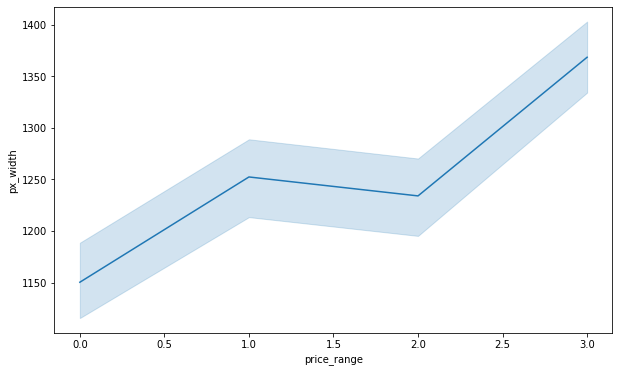

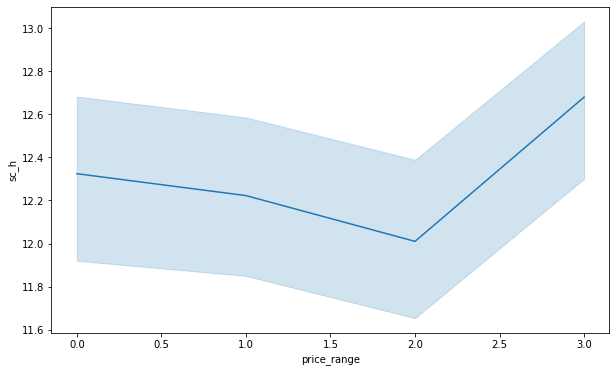

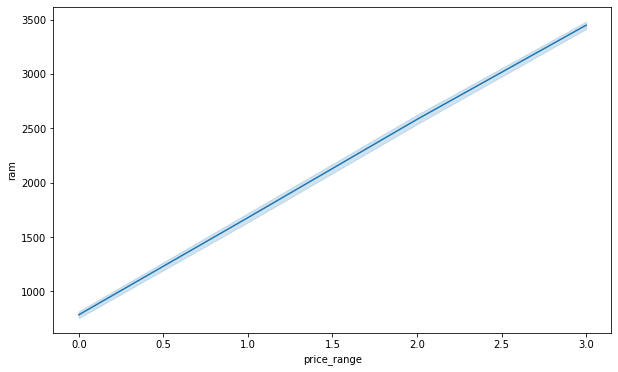

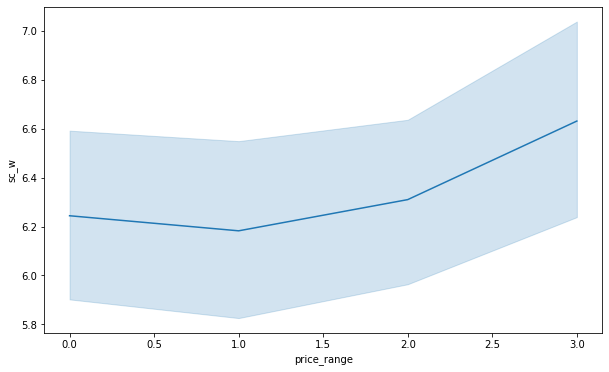

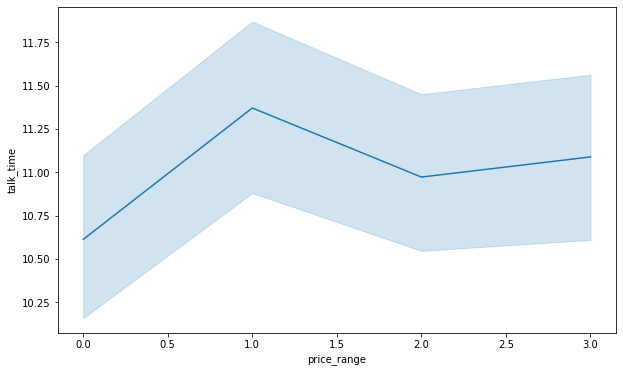

In [84]:
# Plotting Boxplot and checking the distribution of dependent variables with respect to price_range
list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
counter=1
for var in list_1:
    plt.figure(figsize=(10,6))
    
    sns.lineplot(x=mobile_data['price_range'],y=mobile_data[var])

For class 1 and class 2 battery power range is almost similar.

As battery power increases, price also increases which is quite obvious.

Mobiles in very high price range(Class 3) has less weight compared to other classes, that means as weight of mobiles decrease price increases.

Mobiles having max screen height and width falls in very high price category.

From the linechart of sc_width and sc_height we observed that, from class 2, Screen width and height starts increasing with price.

Similarly with px_height and px_width, as resolution of screen increases the price also increases.

We also saw that RAM has clear and linear relationship with price range, we saw that in correlation matrix too.

In [85]:
# Analyzing the Mobiles having both 3G and 4G specifications.
three_g_and_4g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']==1)]

In [86]:
three_g_and_4g_df['price_range'].value_counts()

3.0    274
1.0    261
0.0    259
2.0    247
Name: price_range, dtype: int64

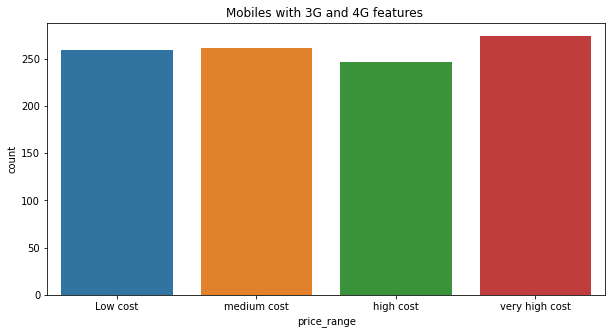

In [87]:
# Visual representation of price range vs 3G & 4G features
plt.figure(figsize=(10,5))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

From the above plot, we can say that mobiles from low cost to very high cost, have both 3G and 4G features almost similarly.

In [88]:
# Analyzing the Mobiles having only 3G specifications.
three_g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']!=1)]

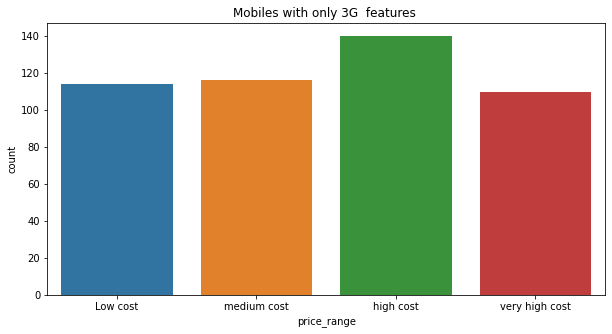

In [89]:
# Visual representation of price range vs 3G feature
plt.figure(figsize=(10,5))
sns.countplot(three_g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with only 3G  features ")
plt.show()

From the above plot we observed that Mobiles with very high cost are very less likely to have 3G.

There are more chances that high cost mobile will have 3G in it.

In [90]:
# Analyzing the Mobiles that does not have both 3G and 4G specifications.
No_3g_4G_df=mobile_data[(mobile_data['three_g']!=1) & (mobile_data['four_g']!=1)]

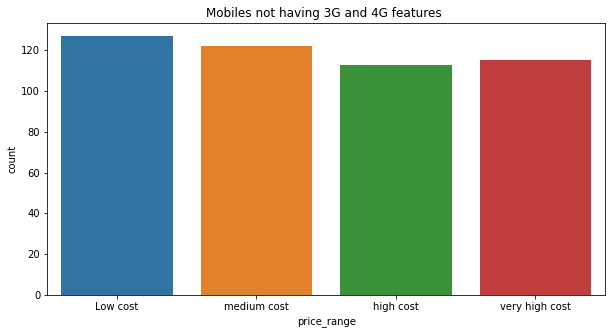

In [91]:
# Visual representation of price range vs mobiles without 4G & 3G features
plt.figure(figsize=(10,5))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

Its very obvious that low cost mobiles will not have 3G and 4G.

Mobiles with very high cost may have advanced network systems like 4G & 5G, as we know technologies are advancing time to time.

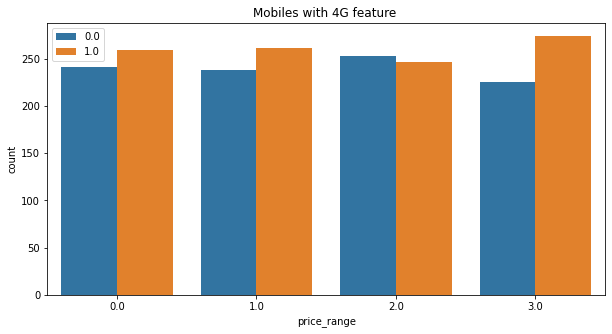

In [92]:
# Analyzing the Mobiles having only 4G specification.
plt.figure(figsize=(10, 5))
sns.countplot(mobile_data['price_range'],hue=mobile_data['four_g'])
plt.title("Mobiles with 4G feature ")
plt.legend(loc='best')

From the above plot we can say that mobiles with very high cost are more likely to have 4G feature than with other price ranges

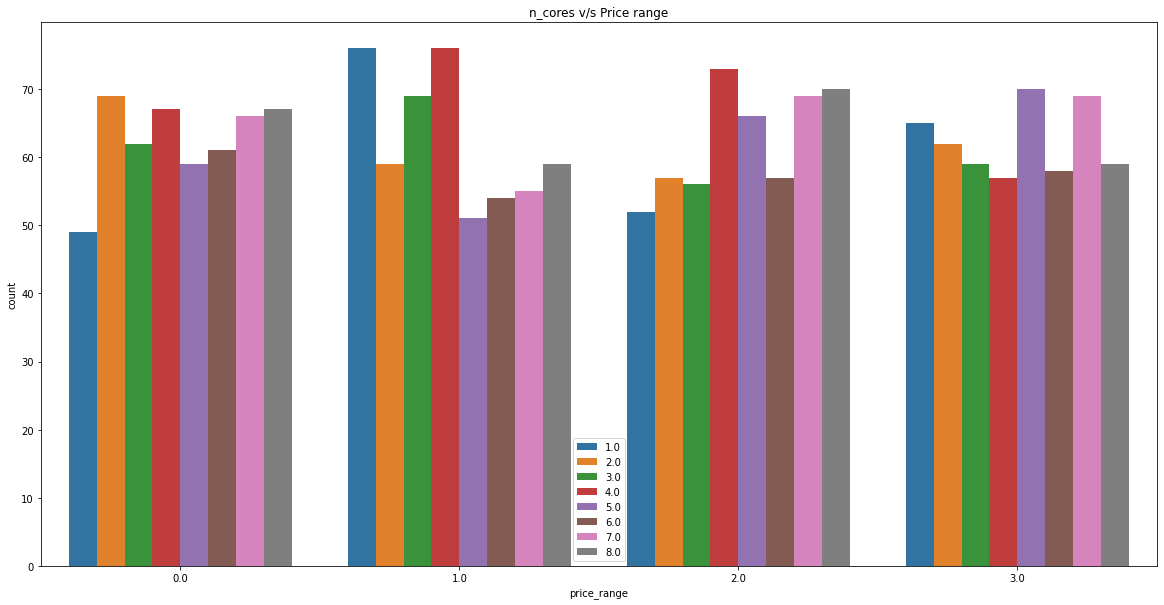

In [93]:
# Analyzing the n_cores with respect to price range
plt.figure(figsize=(20,10))
sns.countplot(mobile_data['price_range'],hue=mobile_data['n_cores'])
plt.title("n_cores v/s Price range")
plt.legend(loc='best')

From the above plot we observed that

For Price range 0 majority of phones have 2 core processors

For Price range 1 majority of phones have 1 and 4 core processors

For Price range 2 majority of phones have 4 core processors

For Price range 3 majority of phones have 5 and 7 core processors


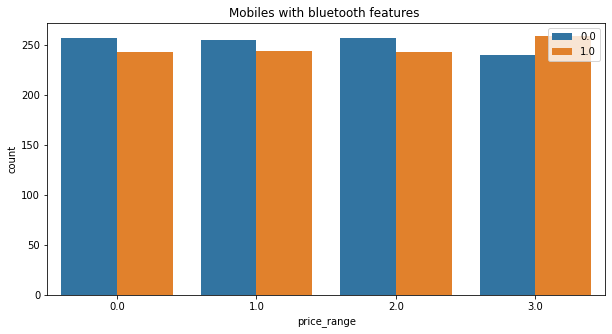

In [94]:
#Analyzing the mobiles with bluetooth feature with respect to price range
plt.figure(figsize=(10, 5))
sns.countplot(mobile_data['price_range'],hue=mobile_data['blue'])
plt.title("Mobiles with bluetooth features ")
plt.legend(loc='best')

Majority of phones with price range from 0 to 2 dont have bluetooth.

On the other hand phones with price range of 3 are more likely to have bluetooth service.

# **Checking the distribution of numerical varaibles and Outliers.**

In [95]:
# Checking the numeric variables
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

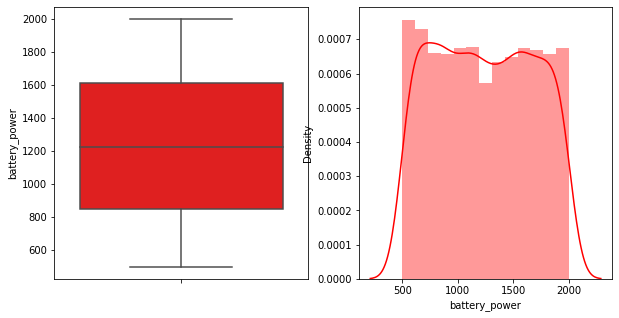

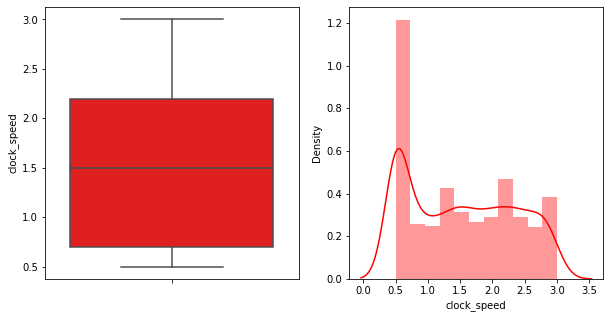

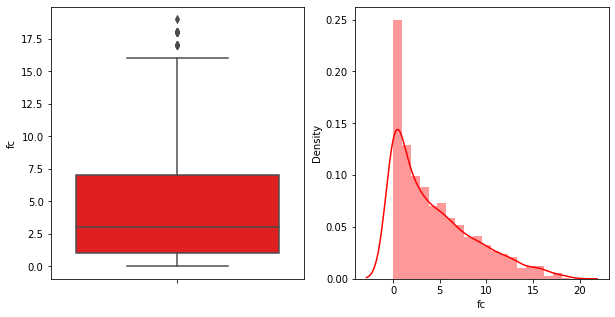

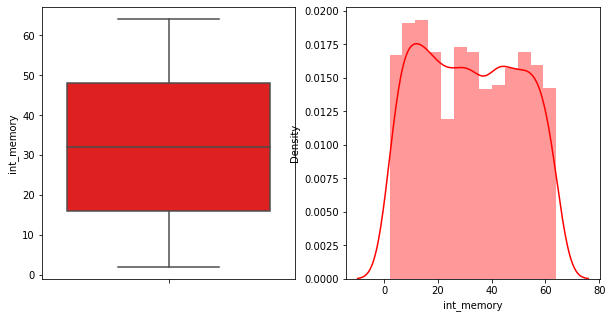

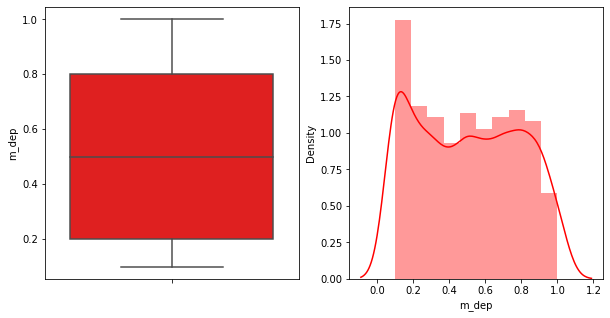

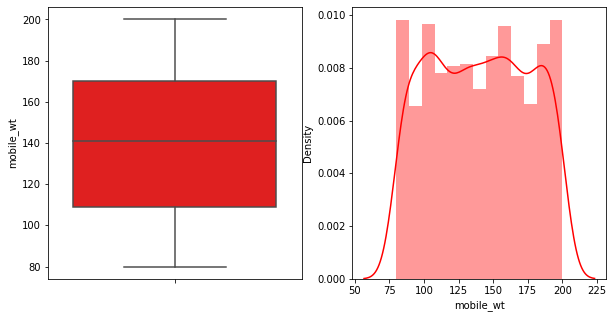

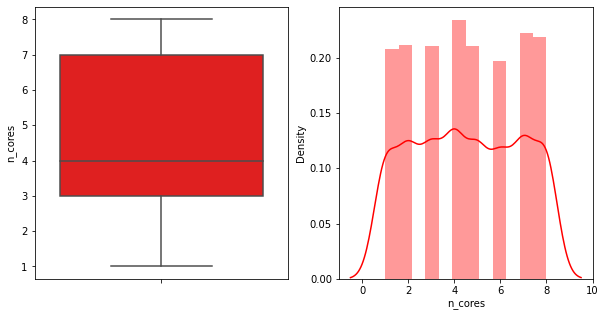

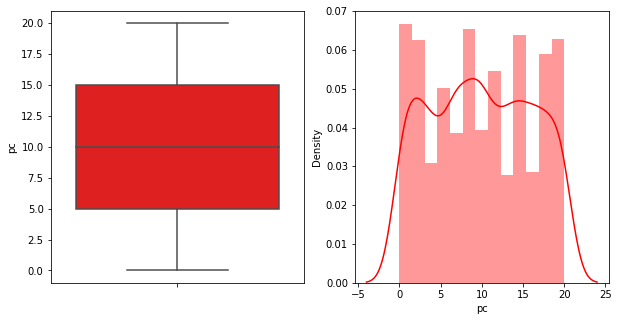

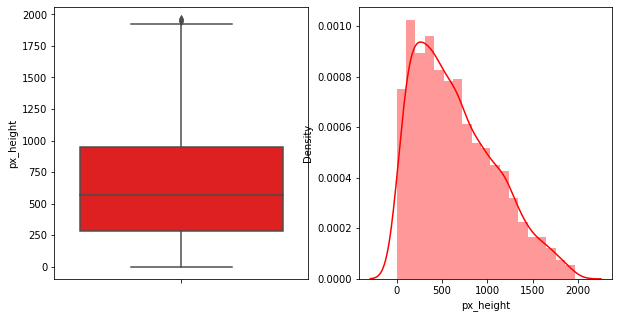

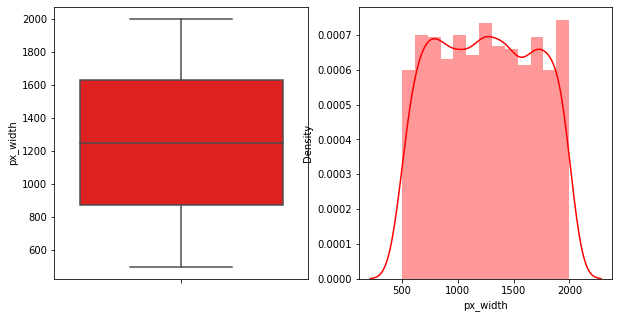

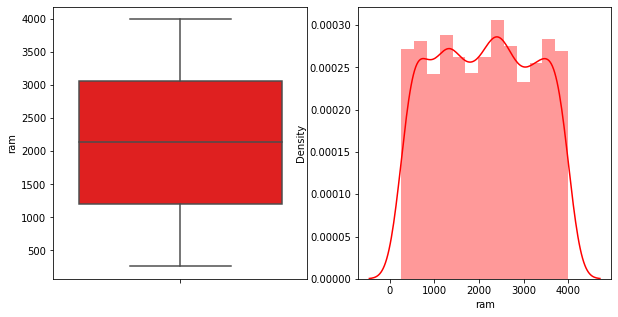

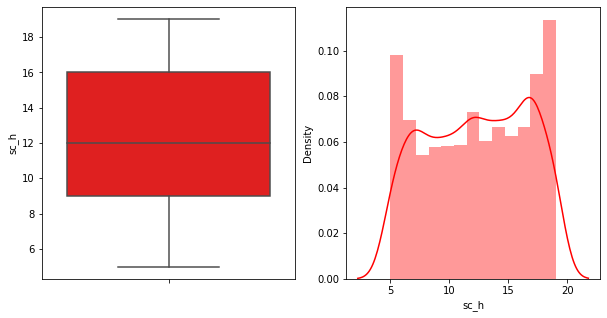

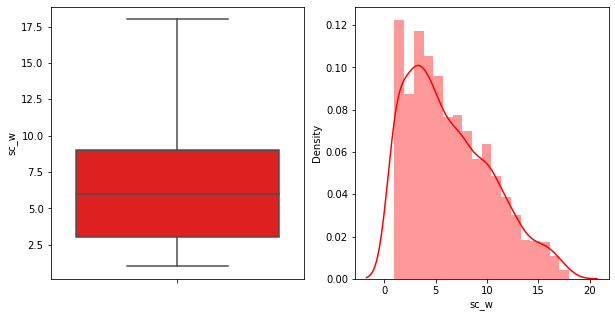

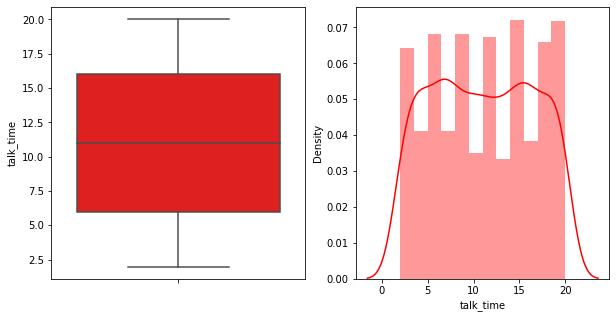

In [96]:
# Visualizing the distribution and checking for the outliers
for var in numeric_col:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_data[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_data[var],color='red')
    
    fig.set_xlabel(var)

    plt.show()

From the above data we can say that Data is well distrubted.

We also observed that fc and px_height has some outliers.

## **Treating the Outliers.**

In [97]:
#Using IQR method for treating the outliers in 'fc'
Q1 = mobile_data["fc"].quantile(0.25)
Q3 = mobile_data['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_data = mobile_data[(mobile_data['fc'] <= Q3)]

In [98]:
#Using IQR method for treating the outliers in 'px_height'
Q1 = mobile_data["px_height"].quantile(0.25)
Q3 = mobile_data['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_data = mobile_data[(mobile_data['px_height'] <= Q3)]

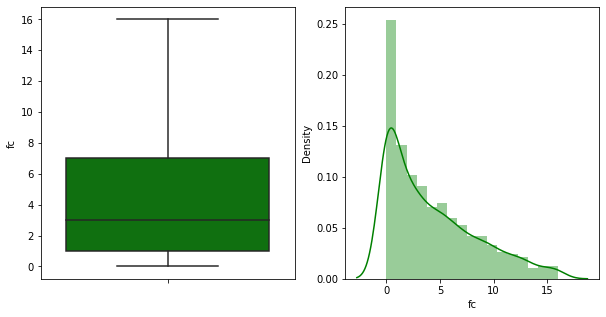

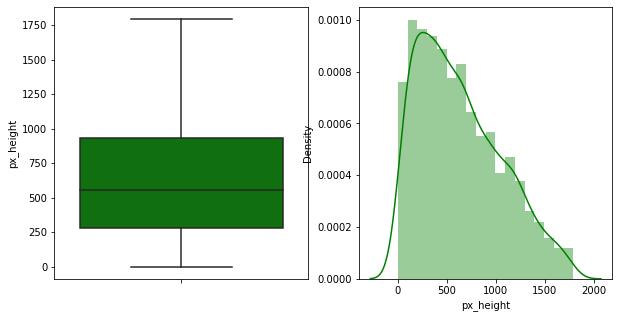

In [99]:
# Checking for oultliers after treatment.
for var in ['fc','px_height']:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_data[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_data[var],color='green')
    
    fig.set_xlabel(var)

    plt.show()

From the above plot we can see through the box plot that there are no oultiers present and from the densityplot we can see that the distribution is normal.

In [100]:
#Creating a copy of mobile_data
mobile_data_df=mobile_data.copy()

In [101]:
mobile_data_df.isna().sum()
mobile_data_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# **Feature Selection**

In [102]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [103]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=mobile_data.drop('price_range',axis=1)
y=mobile_data["price_range"]

In [104]:
#Selecting the 12 best important features for model performance
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)


In [105]:
# Creating a Dataframe for score's and column's 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [106]:
#Grouping the above two dataframes together
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [107]:
# Checking the final dataframe
featureScores

,Specs,Score
0,battery_power,13276.863289
1,blue,0.625168
2,clock_speed,0.830213
3,dual_sim,0.736762
4,fc,10.867193
5,four_g,1.319605
6,int_memory,78.357703
7,m_dep,0.797351
8,mobile_wt,87.027556
9,n_cores,8.395937


In [110]:
# Selecting the 12 Best features with highest chi squared statistic.
print(featureScores.nlargest(12,'Score'))

            Specs          Score
13            ram  914971.362532
11      px_height   15629.508974
0   battery_power   13276.863289
12       px_width    9172.791036
8       mobile_wt      87.027556
6      int_memory      78.357703
14           sc_h      11.815783
16      talk_time      11.460771
15           sc_w      11.079469
4              fc      10.867193
9         n_cores       8.395937
10             pc       7.639203


In [111]:
# Selecting the best 12 features with highest chi squared statistic as independent variables.
X=mobile_data[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc']]

# Assigning the Dependent varaible
y=mobile_data['price_range']


# **Preparing the Data for Modelling**

The Algorithms which we are going to use for model building are as follows:

1) Decision Tree Classifier

2) Random Forest Classifier

3) Gradient Boosting Classifier

4) K-nearest Neighbour Classifier

5) XG Boost Classifier

6) Support Vector Machine(SVM)

Algorithms like Decision tree, Random forest do not require Feature scaling as these are Tree based models.

i.e, they are not sensitive to the the variance in the data.
So we will be using X_train and X_test which are not scaled.

For K nearest Neighbors and SVM, we will be using X_train_scaled and X_test_scaled as these are distance based Algorithms.

i.e,
 we will use Standardised(Scaled) data.

In [112]:
# Importing all the required libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [113]:
# Splitting the data into Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1471, 12)
(491, 12)
(1471,)
(491,)


## **Scaling the data**

In [115]:
# Creating an object of MinMax Scaler
scaler=StandardScaler()

# Fitting the X_train
X_train_scaled=scaler.fit_transform(X_train) 

# Transforming X_test
X_test_scaled=scaler.transform(X_test)         

In [116]:
#Checking the scaled data
X_train_scaled

array([[-1.58417374, -0.62116995, -1.00937328, ..., -0.76057605,
         1.50411283, -0.62130099],
       [-0.27202044, -0.08826781,  0.08864226, ..., -0.28337094,
        -0.25153087,  1.54441881],
       [ 0.78232245, -1.40074294,  1.03858517, ...,  1.38684692,
         1.50411283,  0.378262  ],
       ...,
       [-0.55662834,  0.71923018, -0.36240977, ..., -0.28337094,
         0.18738006, -0.78789482],
       [ 0.9800695 , -1.34023877,  0.87684429, ...,  1.14824437,
         0.62629098,  1.04463732],
       [ 0.15396735, -0.19298657,  0.74016186, ..., -0.28337094,
         0.62629098, -0.62130099]])

In [117]:
#Checking the scaled data
X_test_scaled

array([[-0.28680527,  0.06997387, -0.25306382, ...,  1.62544947,
         0.18738006,  1.37782498],
       [ 0.86086684, -0.90507414, -1.68822937, ...,  2.34125713,
         0.62629098,  1.71101264],
       [ 0.31660044,  0.82394894,  1.55797841, ..., -0.76057605,
        -0.6904418 , -1.28767631],
       ...,
       [ 1.45133583,  2.29233867, -0.41708274, ...,  0.90964182,
        -0.6904418 ,  1.37782498],
       [ 0.7509047 , -1.12382   , -1.61988815, ...,  1.38684692,
         1.06520191,  0.71144966],
       [-0.77655263, -1.26111793, -0.66538916, ...,  0.43243671,
         1.50411283, -0.45470716]])

In [118]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300); 

In [131]:
# Creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

In [151]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

# **Decision Tree Classifier**

In [120]:
# Creating a object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)

In [121]:
# Fitting the model and training.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [122]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [123]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [124]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8391038696537678

In [125]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[123,  15,   0,   0],
       [ 13,  87,  15,   0],
       [  0,  14,  99,   6],
       [  0,   0,  16, 103]])

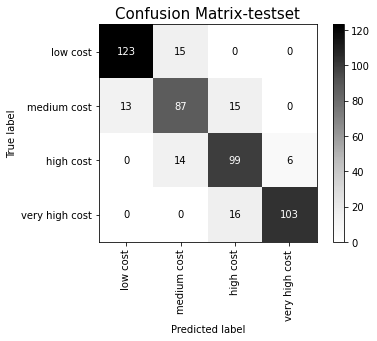

In [134]:
# Plotting the confusion matrix for test set.
plot_confusion_matrix(dtc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [135]:
# Printing the Classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [136]:
# Printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       138
         1.0       0.75      0.76      0.75       115
         2.0       0.76      0.83      0.80       119
         3.0       0.94      0.87      0.90       119

    accuracy                           0.84       491
   macro avg       0.84      0.84      0.84       491
weighted avg       0.84      0.84      0.84       491



From the above results we observed that

Train set accuracy is 100% and test accuracy is 84%.

We can say that the Model is overfitted on train set and did not generalise well.

We will tune hyperparamters to reduce overfitting and try to improve the model performance.

## **Hyperparameter Tuning on Decision Tree classifier**

In [137]:
# Initializing the paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [139]:
# Applying GridSearchCv and fitting.
dtc_tune=GridSearchCV(dtc,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)

# Model fitting.
dtc_tune.fit(X_train,y_train)   

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.292 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.289 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.323 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.279 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.303 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.298 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.248 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [140]:
# Printing the best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [141]:
# Printing the best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3,
                       random_state=0)

In [142]:
# Applying this best parameters to above Decision tree Classifier.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [143]:
# Predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [144]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9762066621346023

In [145]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.8513238289205702

In [147]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[130,   8,   0,   0],
       [ 12,  93,  10,   0],
       [  0,  16,  92,  11],
       [  0,   0,  16, 103]])

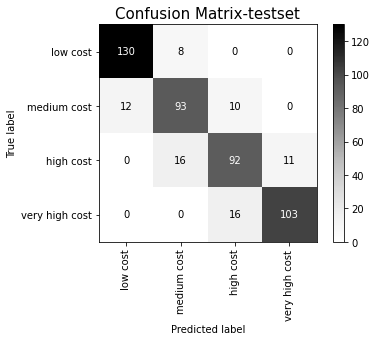

In [148]:
# Plotting confusion matrix for test set.
plot_confusion_matrix(dtc_optimal,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [149]:
# Printing the Classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       356
         1.0       0.96      0.97      0.97       376
         2.0       0.98      0.97      0.97       372
         3.0       0.99      0.99      0.99       367

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [150]:
# Printing the Classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       138
         1.0       0.79      0.81      0.80       115
         2.0       0.78      0.77      0.78       119
         3.0       0.90      0.87      0.88       119

    accuracy                           0.85       491
   macro avg       0.85      0.85      0.85       491
weighted avg       0.85      0.85      0.85       491



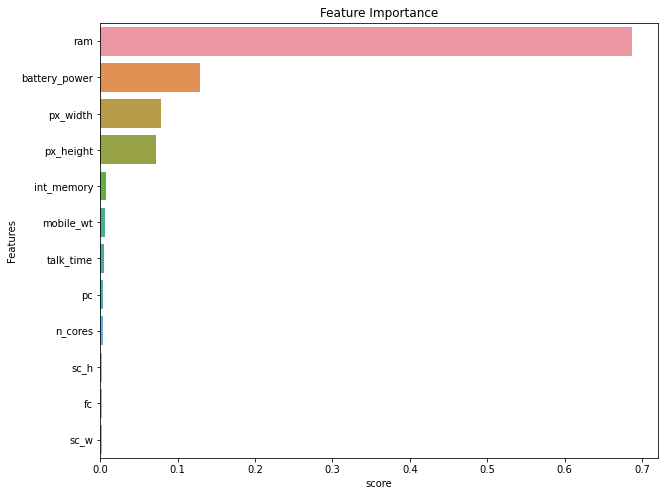

In [152]:
#Plotting the Feature importances
plot_feature_importance(dtc_optimal)

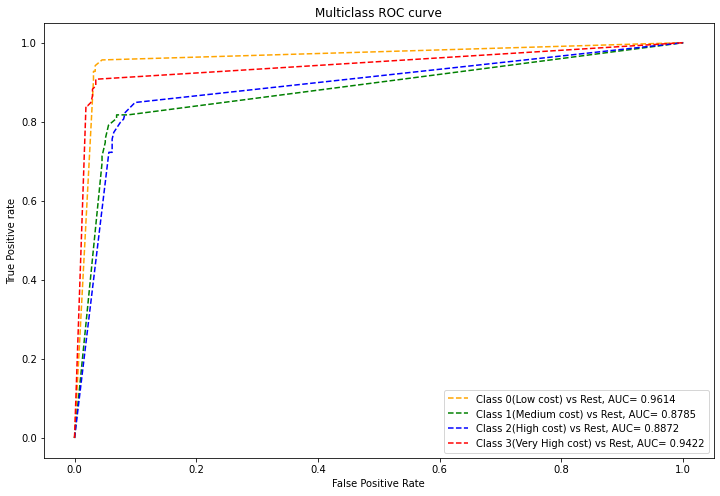

In [153]:
# Plotting AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

## **Observations**

After **Hyperparameter Tuning**,

Train accuracy has been reduced to **98**% from **100**% and test accuracy is increased from **84**% to **85**%.
Thus we can say that we reduced the overfitting by some extent by reducing the training accuarcy.
However this is might not be the best model for us.

From the **Feature importance** plot we understood that

**RAM**, **battery_power**, **px_height** and **px_width** are the most important featrures

From the **AUC** **ROC** cure we observed that

This model classified the **Class 0** and **Class 3** very nicely.

We can see the AUC is almost 0.96 for both Classes, whereas for Class 1 and Class 2 it is 0.88.

# **Random Forest Classifier**

In [154]:
# Splitting the data into train set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [155]:
# Creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [156]:
# Fitting the model and training.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [157]:
# Predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [158]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [159]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.8859470468431772

In [163]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[129,   9,   0,   0],
       [ 10,  95,  10,   0],
       [  0,  13, 102,   4],
       [  0,   0,  10, 109]])

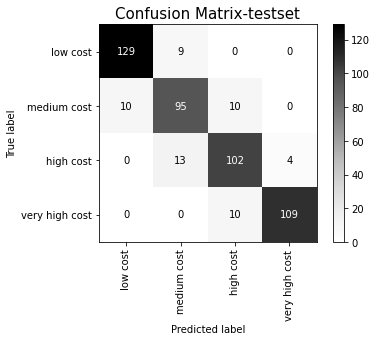

In [162]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rfc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [164]:
# Printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [165]:
# Printing the classification report for train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       138
         1.0       0.81      0.83      0.82       115
         2.0       0.84      0.86      0.85       119
         3.0       0.96      0.92      0.94       119

    accuracy                           0.89       491
   macro avg       0.89      0.88      0.88       491
weighted avg       0.89      0.89      0.89       491



From the above results we observed that

Train set accuracy is **100% **and test accuracy is **89%** which is quite good.

But Model seems to be overfitted and has not generalised the data well.

We will tune hyperparamters to reduce overfitting and try to improve the model performance.

## **Hyperparamter Tunning of the Random forest Classifier**

In [166]:
# Initializing the paramter grid values for hyperparameter tunning.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']
          }

In [168]:
# Applying GridSearchCv and fitting.
rfc_tune=GridSearchCV(rfc,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.876 total time=   2.6s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.890 total time=   3.3s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.920 total time=   2.9s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.874 total time=   3.4s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.882 total time=   2.2s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.920 to

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy', verbose=3)

In [169]:
# Printing the best parameters for model.
rfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 6,
 'n_estimators': 700}

In [170]:
# Fitting the data and training with best parameters.
rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=None,max_leaf_nodes=None,min_samples_split=6,n_estimators=700,random_state=0)
rfc_optimal.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=6,
                       n_estimators=700, random_state=0)

In [171]:
# Predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [172]:
# Checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

1.0

In [173]:
# Checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.8981670061099797

In [174]:
# Confusion matrix for test set
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[130,   8,   0,   0],
       [  7,  98,  10,   0],
       [  0,  14, 100,   5],
       [  0,   0,   6, 113]])

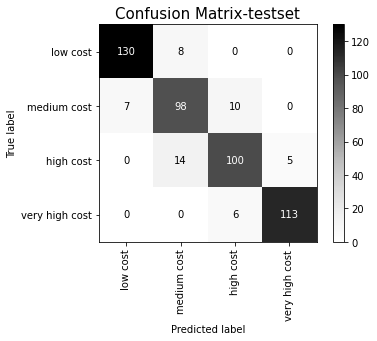

In [175]:
# Plotting confusion matrix for test set.
plot_confusion_matrix(rfc_optimal,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [176]:
# Printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [177]:
# Printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       138
         1.0       0.82      0.85      0.83       115
         2.0       0.86      0.84      0.85       119
         3.0       0.96      0.95      0.95       119

    accuracy                           0.90       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.90      0.90      0.90       491



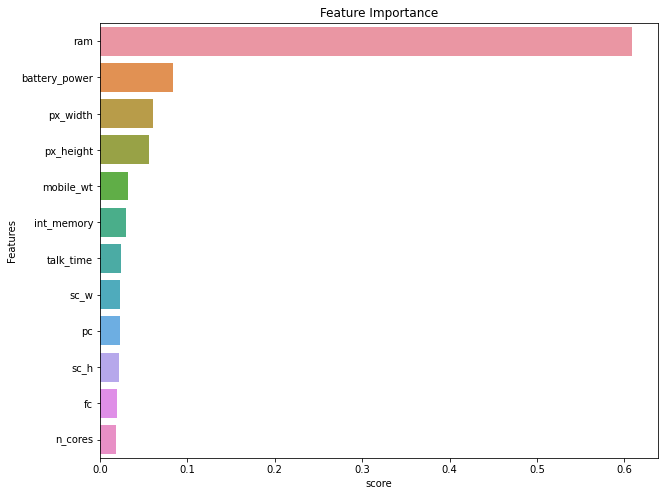

In [178]:
#Plotting Feature importances
plot_feature_importance(rfc_optimal)

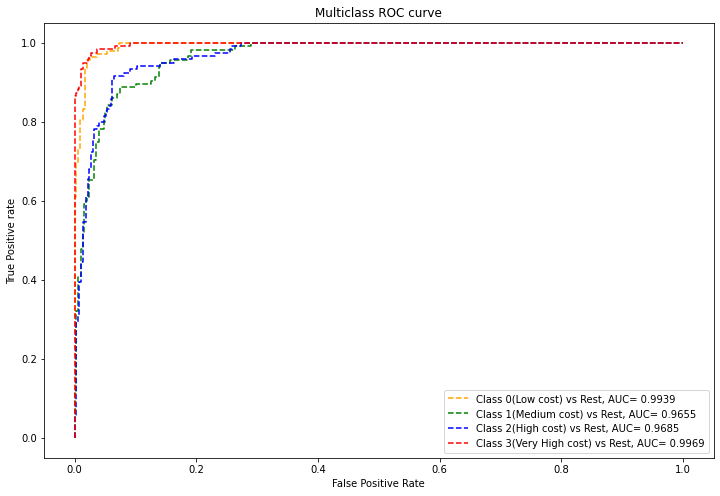

In [179]:
# Plotting AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

After HyperParameterTuning we observed that

Training accuarcy= 100%.

Test accuarcy = 90%.

We improved the model by reducing the overfitting slightly.
However we cant say that this model is good enough for us

From roc curve we observed that model has poorly performed to classify class 1 and class 2.

# **Gradient Boosting Classifier**

In [180]:
# Splitting the data into train set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [181]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [182]:
# Fittng the data and training.
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [186]:
# Predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [187]:
# Checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

1.0

In [188]:
# Checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.90020366598778

In [190]:
# Confusion matrix for test data
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[132,   6,   0,   0],
       [  9,  99,   7,   0],
       [  0,  12, 102,   5],
       [  0,   0,  10, 109]])

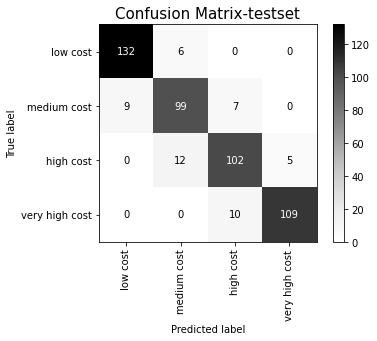

In [191]:
# Plotting Confusion matrix for test set.
plot_confusion_matrix(gbc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [192]:
# Printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [196]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       138
         1.0       0.85      0.86      0.85       115
         2.0       0.86      0.86      0.86       119
         3.0       0.96      0.92      0.94       119

    accuracy                           0.90       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.90      0.90      0.90       491



From the above results we observed that

Train set accuracy is 100% and test accuracy is 90% which is quite good compared to the model earlier.

But Model seems to be overfitted here and has not generalised the data well .

We will tune hyperparamters to reduce overfitting and try to improve the model performance.

## **Hyperparameter Tuning on Gradient Boosting Classifier**

In [197]:
# Initializing the paramter grid values for hyperparameter tunning.
grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)
             }

In [198]:
# Applying GridSearchCv and fitting.
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [199]:
# Printing the best parameters for model.
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 22}

In [200]:
# Printing best estimators
gbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=22,
                           random_state=0)

In [202]:
# Applying best estimarors and Fitting the model
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=25)
gbc_optimal.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=25,
                           random_state=0)

In [203]:
# Predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)  
y_pred=gbc_optimal.predict(X_test)

In [204]:
# Train set accuracy score
accuracy_score(y_train,y_train_pred)

1.0

In [205]:
# Test set accuracy score
accuracy_score(y_test,y_pred)

0.9042769857433809

In [206]:
# Confusion matrix for test data
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[131,   7,   0,   0],
       [  7, 102,   6,   0],
       [  0,  11, 102,   6],
       [  0,   0,  10, 109]])

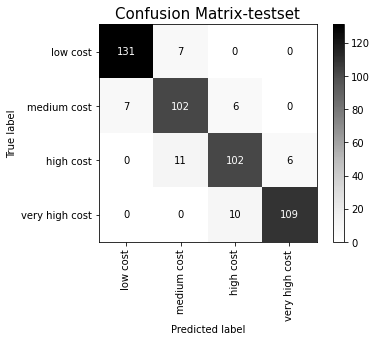

In [207]:
# Plotting confusion matrix for test set.
plot_confusion_matrix(gbc_optimal,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [208]:
# Printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       356
         1.0       1.00      1.00      1.00       376
         2.0       1.00      1.00      1.00       372
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [209]:
# Printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       138
         1.0       0.85      0.89      0.87       115
         2.0       0.86      0.86      0.86       119
         3.0       0.95      0.92      0.93       119

    accuracy                           0.90       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.91      0.90      0.90       491



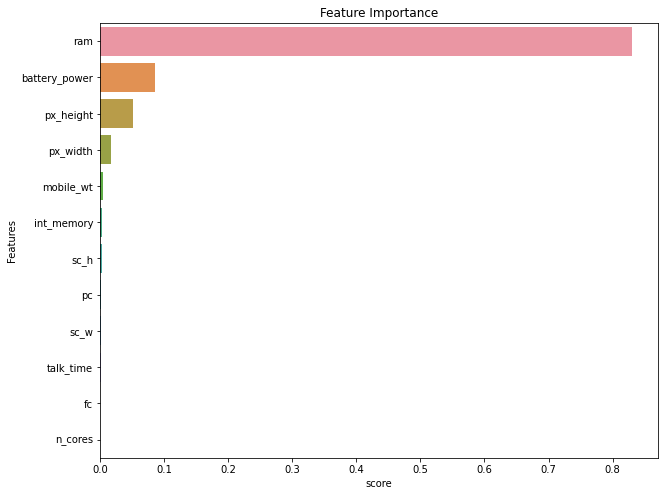

In [210]:
#Plotting Feature importances
plot_feature_importance(gbc_optimal)

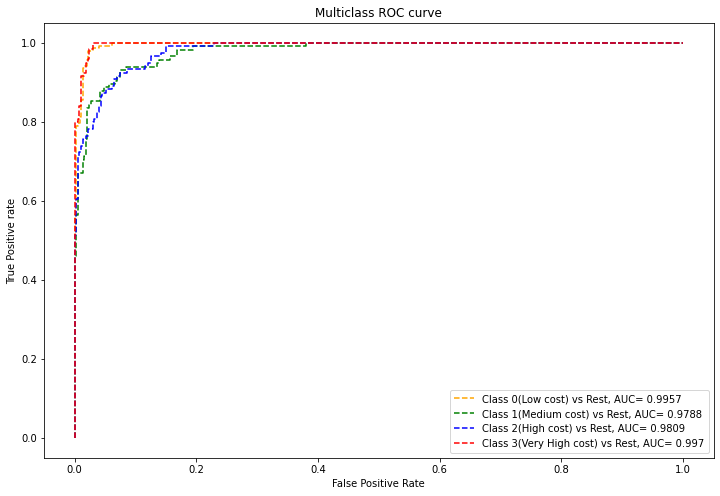

In [211]:
# Plotting AUC ROC curve.
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

After Hyperparameter Tuning

Train accuracy score= 100%

Test accuarcy score=90%

We improved the model performance very slightly, However the model is not best.

From ROC curve it's clear that model was good to classify the class 0 and class 3.

From the classification report its clear that recall for class 0 and class 3 is also good which is 95% and 92% respectively.